In [1]:
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import nltk

In [2]:
train = pd.read_csv('C:/Python 3.6/sample/cp2/train_cp2.csv')
test = pd.read_csv('C:/Python 3.6/sample/cp2/test_cp2.csv')

In [3]:
train['id'] = train.index
train.head()

,class,tweet,id
0,1,"[9-1-13] 2:50 pm ""son of a bitch ate my mac n ...",0
1,1,RT @BryceSerna: Don't be a pussy grab the boot...,1
2,2,RT @ClicquotSuave: bunch of rappers boutta flo...,2
3,2,@michigannews13 wow. Thats great language comi...,3
4,1,"and this is why I'm single, I don't fuck with ...",4


In [4]:
test.head()

,id,tweet
0,0,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
2,2,"!!!!!!""@__BrighterDays: I can not just sit up ..."
3,3,!!!!&#8220;@selfiequeenbri: cause I'm tired of...
4,4,""" @rhythmixx_ :hobbies include: fighting Maria..."


In [5]:
combi = train.append(test, ignore_index=True)
combi.head()

c:\users\allni\appdata\local\programs\python\python36\lib\site-packages\pandas\core\frame.py:6692: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort)


,class,id,tweet
0,1.0,0,"[9-1-13] 2:50 pm ""son of a bitch ate my mac n ..."
1,1.0,1,RT @BryceSerna: Don't be a pussy grab the boot...
2,2.0,2,RT @ClicquotSuave: bunch of rappers boutta flo...
3,2.0,3,@michigannews13 wow. Thats great language comi...
4,1.0,4,"and this is why I'm single, I don't fuck with ..."


In [6]:
# remove '@[\w]*' in column 'tweet'
def remove_pattern(input_txt, pattern):
    r = re.findall(pattern, input_txt)
    for i in r:
        input_txt = re.sub(i, '', input_txt)
    return input_txt
combi['tidy_tweet'] = np.vectorize(remove_pattern)(combi['tweet'], '@[\w]*')

In [7]:
combi.head()

,class,id,tweet,tidy_tweet
0,1.0,0,"[9-1-13] 2:50 pm ""son of a bitch ate my mac n ...","[9-1-13] 2:50 pm ""son of a bitch ate my mac n ..."
1,1.0,1,RT @BryceSerna: Don't be a pussy grab the boot...,RT : Don't be a pussy grab the booty. Love the...
2,2.0,2,RT @ClicquotSuave: bunch of rappers boutta flo...,RT : bunch of rappers boutta flood the interne...
3,2.0,3,@michigannews13 wow. Thats great language comi...,wow. Thats great language coming from a HS co...
4,1.0,4,"and this is why I'm single, I don't fuck with ...","and this is why I'm single, I don't fuck with ..."


In [8]:
# remove special characters, numbers, punctuations
combi['tidy_tweet'] = combi['tidy_tweet'].str.replace('[^a-zA-Z#]', ' ')
# [^a-zA-Z] :[ ]指成员关系，^指取反

In [9]:
combi.head()

,class,id,tweet,tidy_tweet
0,1.0,0,"[9-1-13] 2:50 pm ""son of a bitch ate my mac n ...",pm son of a bitch ate my mac n ...
1,1.0,1,RT @BryceSerna: Don't be a pussy grab the boot...,RT Don t be a pussy grab the booty Love the...
2,2.0,2,RT @ClicquotSuave: bunch of rappers boutta flo...,RT bunch of rappers boutta flood the interne...
3,2.0,3,@michigannews13 wow. Thats great language comi...,wow Thats great language coming from a HS co...
4,1.0,4,"and this is why I'm single, I don't fuck with ...",and this is why I m single I don t fuck with ...


In [12]:
from nltk.corpus import stopwords
nltk.download('stopwords')

print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\allni\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [13]:
# 將字母數少於3的詞去掉
icombi['tidy_tweet'] = combi['tidy_tweet'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))
combi['tidy_tweet'].head()

0                               bitch cheese http oJYZ
1         pussy grab booty Love booty Appreciate booty
2    bunch rappers boutta flood internets trash rem...
3    Thats great language coming from coach sure ro...
4        this single fuck with bitches there attitudes
Name: tidy_tweet, dtype: object

In [14]:
stops = set(stopwords.words('english'))
stops


{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 'r

In [15]:
# 將 tidt_tweet 中的詞都變成小寫，在將屬於stopwrods中的字刪掉
def func(x):
    x = x.split()
    x = list(map(lambda t:t.lower(),x))
    for i in x:
        if i in stops:
            x.remove(i)
    return x

tokenized_tweet = combi['tidy_tweet'].apply(lambda x: func(x))
tokenized_tweet.head(6)

0                          [bitch, cheese, http, ojyz]
1    [pussy, grab, booty, love, booty, appreciate, ...
2    [bunch, rappers, boutta, flood, internets, tra...
3    [thats, great, language, coming, coach, sure, ...
4                   [single, fuck, bitches, attitudes]
5                       [rocking, friday, last, night]
Name: tidy_tweet, dtype: object

In [16]:
# 將動詞換成原型
from nltk.stem.porter import *
stemmer = PorterStemmer()

tokenized_tweet = tokenized_tweet.apply(lambda x: [stemmer.stem(i) for i in x])
tokenized_tweet.head()
for i in range(len(tokenized_tweet)):
    tokenized_tweet[i] = ' '.join(tokenized_tweet[i])
combi['tidy_tweet'] = tokenized_tweet

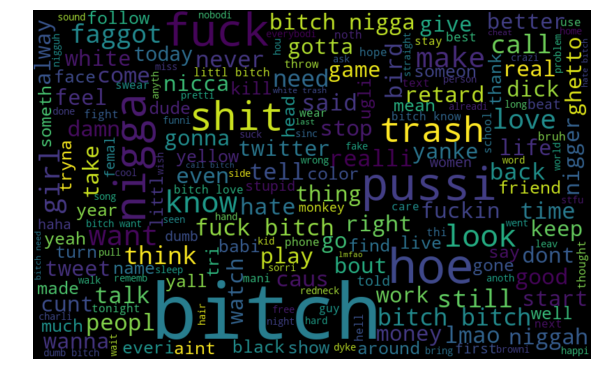

In [17]:
all_words = ' '.join([text for text in combi['tidy_tweet']])
from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)
plt.figure(figsize=(10,7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [18]:
#Bag-of-Words Features
from sklearn.feature_extraction.text import CountVectorizer
bow_vectorizer = CountVectorizer(max_df=0.90, min_df=2, max_features=1000, stop_words='english')
# bag-of-words feature matrix
bow = bow_vectorizer.fit_transform(combi['tidy_tweet'])

#TF-IDF feature
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(max_df=0.90, min_df=2, max_features=1000, stop_words='english')
# TF-IDF feature matrix
tfidf = tfidf_vectorizer.fit_transform(combi['tidy_tweet'])

In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import f1_score


train_bow = bow[:14869,:]
test_bow = bow[14869:,:]

# splitting data into training and validation set
xtrain_bow, xvalid_bow, ytrain, yvalid = train_test_split(train_bow, train['class'], random_state=42, test_size=0.3)

lreg = LogisticRegression()


In [20]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=9)
xtrain_bow, xvalid_bow, ytrain, yvalid = train_test_split(train_bow, train['class'], random_state=42, test_size=0.3)


In [21]:
train_tfidf = tfidf[:14869,:]
test_tfidf = tfidf[14869:,:]

xtrain_tfidf = train_tfidf[ytrain.index]
xvalid_tfidf = train_tfidf[yvalid.index]

lreg.fit(xtrain_tfidf, ytrain)

prediction1 = lreg.predict(xvalid_tfidf)

c:\users\allni\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\allni\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


<class 'numpy.ndarray'>
(3, 1000)
(1000,)
['yanke' 'bird' 'charli' 'yellow' 'mock' 'trash' 'jihadi' 'browni' 'sole'
 'oreo' 'color' 'crow' 'clam' 'fuzzi' 'monkey' 'chug' 'racist' 'redskin'
 'yank' 'cracker' 'teabagg' 'fairi' 'zebra' 'whitey' 'hoosier' 'loyal'
 'gotta' 'grown' 'come' 'hell' 'nicca' 'swear' 'cunt' 'dick' 'damn'
 'fuckin' 'ratchet' 'booti' 'high' 'girl' 'twat' 'nigguh' 'fuck' 'bout'
 'tryna' 'niggah' 'shit' 'hoe' 'pussi' 'bitch']


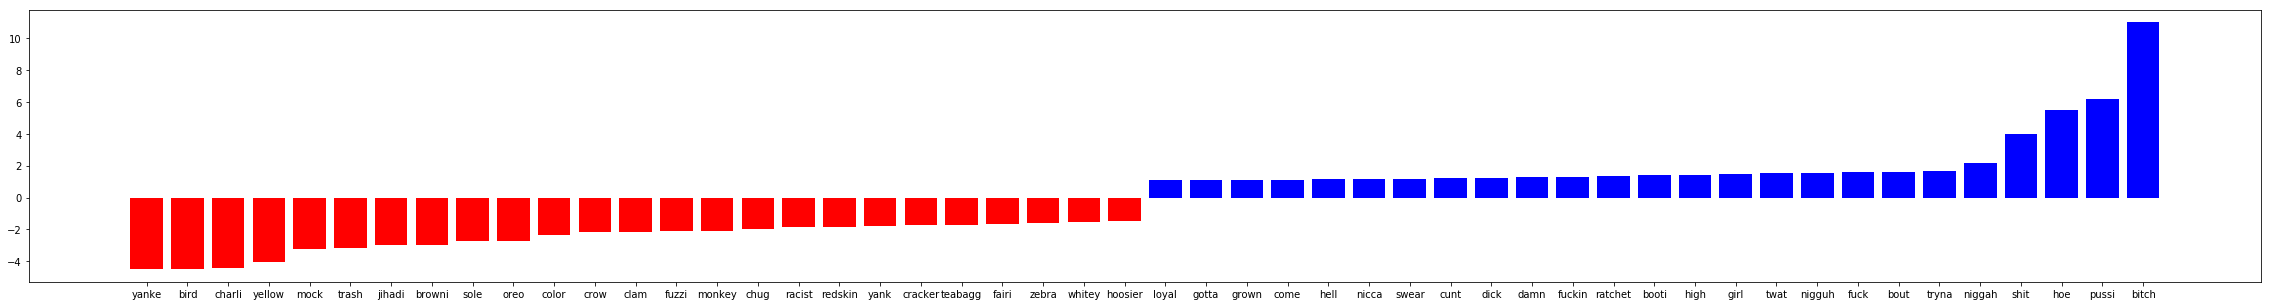

In [22]:
def visualize_coefficients(classifier, feature_names, n_top_features=25):
    print(type(classifier.coef_))
    print(classifier.coef_.shape)
    coef = classifier.coef_[1].ravel()
    print(coef.shape)
    positive_coefs = np.argsort(coef)[-n_top_features:]
    negative_coefs = np.argsort(coef)[:n_top_features]
    interesting_coefs = np.hstack([negative_coefs, positive_coefs])
    plt.figure(figsize=(40,5))
    colors = ['red' if c<0 else 'blue' for c in coef[interesting_coefs]]
    plt.bar(np.arange(50), coef[interesting_coefs], color=colors)
    feature_names = np.array(feature_names)
#     print(len(feature_names))
    plt.xticks(np.arange(50), feature_names[interesting_coefs])
    print(feature_names[interesting_coefs])
visualize_coefficients(lreg, tfidf_vectorizer.get_feature_names())


In [23]:
class_pred = lreg.predict(test_tfidf)
class_pred.shape

(9914,)

In [24]:
result = pd.DataFrame(columns=['id', 'class'])
result['id'] = test.index
result['class'] = class_pred
save = 'C:\Python 3.6\sample\cp2\\predict_5.csv'
result.to_csv(save, mode='w', index=False)